## K-means 聚类

无监督学习

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat

find_closest_cluster函数是寻找距离最近的簇

In [7]:
def find_closest_cluster(x,cluster):
    m = x.shape[0]#点数
    k = cluster.shape[0]#簇的数量
    idx = np.zeros(m)
    
    for i in range(m):
        min_dist = 1000000
        for j in range(k):#遍历所有的cluster寻找最近的
            dist = np.sum((X[i,:] - cluster[j,:]) ** 2)#dist是与第j个的距离
            if dist < min_dist:
                min_dist = dist
                idx[i] = j
                
                
    return idx

这里使要用到mat数据所以使用了一个新的包

In [18]:
data = loadmat('data/ex7data2.mat')
x = data['X']
data2 = pd.DataFrame(x,columns=['X1','X2'])
data2.head()

,X1,X2
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894


   Seaborn 是基于 Python 且非常受欢迎的图形可视化库，在 Matplotlib 的基础上，进行了更高级的封装，使得作图更加方便快捷。即便是没有什么基础的人，也能通过极简的代码，做出具有分析价值而又十分美观的图形。  
   
这里使用了seaborn进行画图。

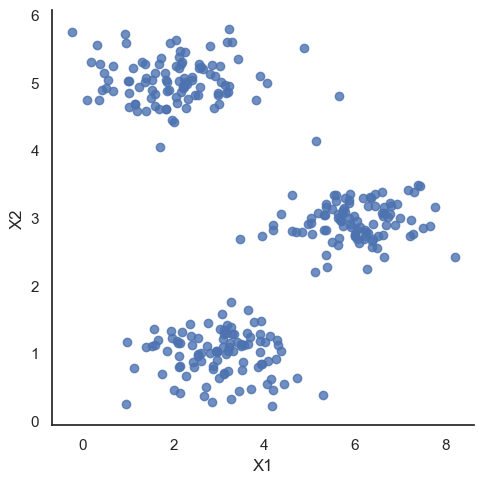

In [22]:
sb.set(context="notebook", style="white")
sb.lmplot(data=data2,x='X1',y='X2',fit_reg=False)


下面是计算一次簇中心的过程

In [35]:
def compute_clusters(X, idx, k):
    m, n = X.shape
    clusters = np.zeros((k, n))
    
    for i in range(k):
        indices = np.where(idx == i)
        clusters[i,:] = (np.sum(X[indices,:], axis=1) / len(indices[0])).ravel()
    
    return clusters

In [36]:
initial_centroids = initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

idx = find_closest_cluster(X, initial_centroids)
compute_clusters(x, idx, 3)

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

下面是迭代的完整过程

In [39]:
def run_k_means(X, initial_centroids, max_iters):
    m, n = X.shape
    k = initial_centroids.shape[0]
    idx = np.zeros(m)
    centroids = initial_centroids
    
    for i in range(max_iters):#进行迭代的次数
        idx = find_closest_cluster(X, centroids)
        centroids = compute_clusters(X, idx, k)
    
    return idx, centroids

In [40]:
idx, centroids = run_k_means(X, initial_centroids, 50)

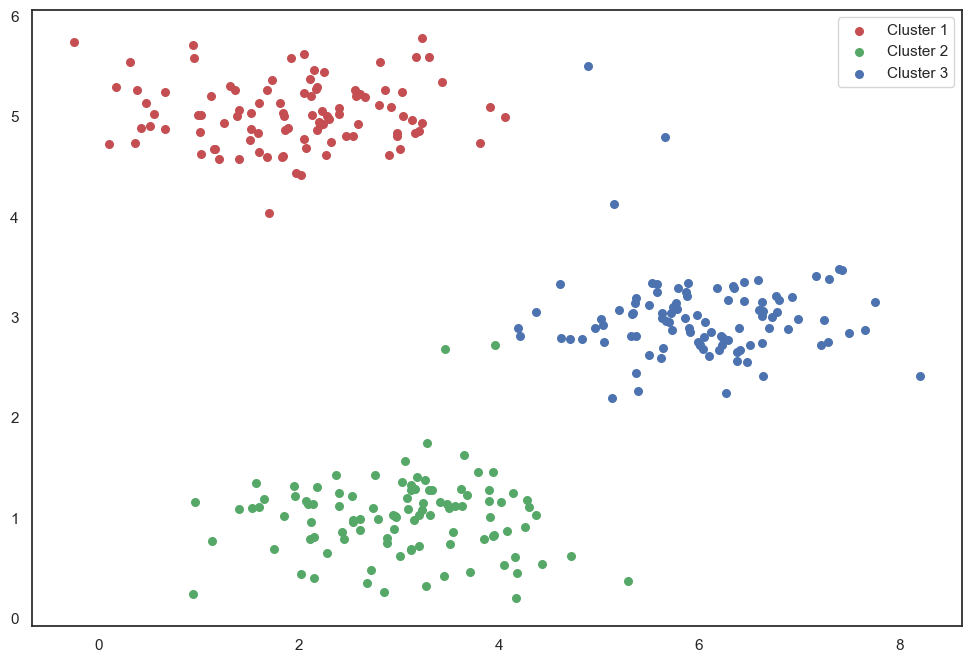

In [45]:
cluster1 = X[np.where(idx == 0)[0],:]
cluster2 = X[np.where(idx == 1)[0],:]
cluster3 = X[np.where(idx == 2)[0],:]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1')
ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2')
ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='Cluster 3')
ax.legend()
plt.show()

随机初始化簇的中心也要编写一个函数